In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import os
import sys
from tqdm import tqdm
sys.path.insert(0, '/mnt/lareaulab/cfbuenabadn/psix_project/psix/psix/')
import psix

In [2]:
psix_object = psix.Psix()
psix_object.process_rnaseq(
        'data/pipeline_output/SE_counts.tab.gz',
        'data/pipeline_output/constitutive_introns.tab.gz',
        'data/pipeline_output/rsem_gene_tpm.tab.gz',
        minJR = 1,
        minCell=1,
        min_observed = 0.25)

Obtaining psi tables...
Reading TPM and transforming to mRNA counts...
mariados


100%|██████████| 202/202 [00:07<00:00, 26.85it/s]


Successfully processed RNA-seq data


In [3]:
psix_object.compute_psix_scores(latent='data/preprocess/tables/pc2_rd.tab.gz', n_jobs=25, n_random_exons=2000, n_neighbors=30)

  0%|          | 0/202 [00:00<?, ?it/s]

cell-cell metric not found. Computing metric...


100%|██████████| 202/202 [00:00<00:00, 473.07it/s]

Successfully computed cell-cell metric
Computing Psix score in 2730 exons



100%|██████████| 2730/2730 [00:07<00:00, 381.04it/s]


Successfully computed Psix score of exons.
...

Estimating p-values. This might take a while...


100%|██████████| 25/25 [01:52<00:00,  4.52s/it]


Successfully estimated p-values


In [4]:
psix_object.psix_results

,psix_score,pvals,qvals
VDAC3_5,2.786359,0.0005,0.005016
TACC2_9,2.682515,0.0005,0.005016
RPS24_4,2.560476,0.0005,0.005016
ERGIC3_5,2.557620,0.0005,0.005016
ATL1_5,2.319005,0.0005,0.005016
...,...,...,...
TULP3_2,-0.361422,1.0000,1.000000
PNPLA8_4,-0.375557,1.0000,1.000000
GPS1_3,-0.379285,1.0000,1.000000
EED_2,-0.388444,1.0000,1.000000


In [13]:
psix_object.psix_results

,psix_score,pvals,qvals
VDAC3_5,2.786359,0.0005,0.005016
TACC2_9,2.682515,0.0005,0.005016
RPS24_4,2.560476,0.0005,0.005016
ERGIC3_5,2.557620,0.0005,0.005016
ATL1_5,2.319005,0.0005,0.005016
...,...,...,...
TULP3_2,-0.361422,1.0000,1.000000
PNPLA8_4,-0.375557,1.0000,1.000000
GPS1_3,-0.379285,1.0000,1.000000
EED_2,-0.388444,1.0000,1.000000


In [10]:
psix_object.adata.uns['psi'].T.to_csv('data/preprocess/tables/psi.tab.gz', sep='\t', index=True, header=True)
psix_object.adata.uns['mrna_per_event'].T.to_csv('data/preprocess/tables/mrna_per_event.tab.gz', 
                                                 sep='\t', index=True, header=True)
psix_object.save_psix_object(overwrite=True)

In [24]:
psix_object.psix_results

,psix_score,pvals,qvals
EWSR1_5,1.565230,0.000500,0.009046
CERS5_nmdSE_1,1.555772,0.000500,0.009046
CKAP5_4,1.529498,0.000500,0.009046
DPF2_4,1.522572,0.000500,0.009046
ASPH_11,1.499329,0.000500,0.009046
...,...,...,...
UBE2I_4,-0.382799,1.000000,1.000000
ZMAT4_nmdSE_2,-0.389669,0.997001,1.000000
XPO1_16,-0.390141,0.997001,1.000000
PHC1_14,-0.417191,1.000000,1.000000


(array([713., 324., 265., 263., 225., 178., 171., 172., 180., 206.]),
 array([4.99750125e-04, 1.00449775e-01, 2.00399800e-01, 3.00349825e-01,
        4.00299850e-01, 5.00249875e-01, 6.00199900e-01, 7.00149925e-01,
        8.00099950e-01, 9.00049975e-01, 1.00000000e+00]),
 <a list of 10 Patch objects>)

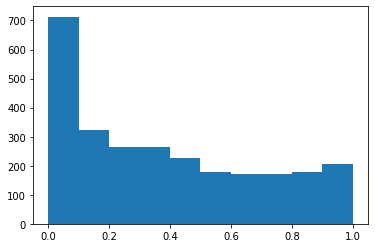

In [22]:
plt.hist(psix_object.psix_results.pvals)

(array([946., 430., 223., 212., 176., 177., 125., 136., 151., 154.]),
 array([4.99750125e-04, 1.00449775e-01, 2.00399800e-01, 3.00349825e-01,
        4.00299850e-01, 5.00249875e-01, 6.00199900e-01, 7.00149925e-01,
        8.00099950e-01, 9.00049975e-01, 1.00000000e+00]),
 <a list of 10 Patch objects>)

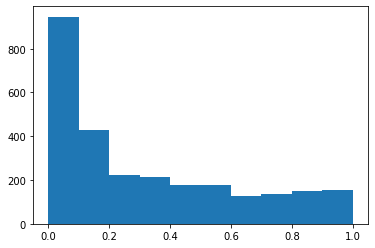

In [12]:
plt.hist(psix_object.psix_results.pvals)

In [11]:
psix_object.adata.uns['psi'].T.to_csv('data/preprocess/tables/psi.tab.gz', sep='\t', index=True, header=True)
psix_object.adata.uns['mrna_per_event'].T.to_csv('data/preprocess/tables/mrna_per_event.tab.gz', 
                                                 sep='\t', index=True, header=True)
psix_object.save_psix_object(overwrite=True)

# Make the cut here

In [17]:
psix_object = psix.Psix()
psix_object.process_rnaseq(
        'data/pipeline_output/SE_counts.tab.gz',
        'data/pipeline_output/constitutive_introns.tab.gz',
        'data/pipeline_output/rsem_gene_tpm.tab.gz',
        minJR = 1,
        minCell=1,
        min_observed = 0.25)

psix_object.compute_psix_scores(latent='/mnt/lareaulab/cfbuenabadn/data_sc_regulation/data_autocorrelation/song/rd_pc2.tab', 
                                n_jobs=5, n_random_exons=2000, n_neighbors=30)

Obtaining psi tables...
Reading TPM and transforming to mRNA counts...


100%|██████████| 202/202 [00:00<00:00, 18885.26it/s]

Successfully processed RNA-seq data
cell-cell metric not found. Computing metric...
Successfully computed cell-cell metric
Computing Psix score in 2730 exons



100%|██████████| 2730/2730 [00:25<00:00, 108.23it/s] 


Successfully computed Psix score of exons.
...

Estimating p-values. This might take a while...


100%|██████████| 25/25 [08:51<00:00, 21.27s/it]  


Successfully estimated p-values


In [21]:
psix_object.save_psix_object(overwrite=True)

In [15]:
psix_object.adata.uns['mrna_per_event']

,AAAS_3,AAMDC_3,AAMDC_6,AARSD1_6,AASDH_5,AASS_2,AASS_6,AASS_7,AASS_nmdSE_2,AASS_nmdSE_3,...,ZNF883_3,ZNF90_3,ZNF91_7,ZNHIT1_3,ZNHIT3_1,ZNRD1_1,ZRANB2_1,ZSWIM7_nmdSE_3,ZSWIM7_9,ZZZ3_3
SRR4047247,NaN,NaN,NaN,83.633915,NaN,2.941897,8.405419,5.883793,3.362167,1.260813,...,NaN,NaN,NaN,0.840542,NaN,NaN,NaN,NaN,NaN,NaN
SRR4047245,77.578477,175.029274,124.584156,4.968080,4.585920,22.929599,259.104471,182.290314,159.742875,NaN,...,NaN,NaN,NaN,18.343679,5.350240,103.183197,23.693919,NaN,NaN,NaN
SRR4047246,NaN,NaN,NaN,51.327675,35.348304,NaN,179.162638,134.129867,129.771857,NaN,...,53.264568,3.873787,NaN,43.580101,NaN,NaN,NaN,NaN,NaN,19.853157
SRR4047248,NaN,132.484511,NaN,0.432956,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,6.494339,NaN,16.452325,7.360251,NaN,43.728548,NaN,NaN,NaN
SRR4047249,7.503165,NaN,NaN,9.003798,NaN,NaN,7.503165,7.878323,10.504431,NaN,...,NaN,NaN,52.897313,21.759179,21.384020,32.638768,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SRR4047454,NaN,NaN,NaN,237.024293,NaN,168.875653,4062.323789,3338.286046,3231.242817,67.151342,...,45.543237,NaN,NaN,NaN,323.456714,NaN,56.513506,143.610792,1.994594,NaN
SRR4047455,172.499861,27.351986,10.940795,238.874015,145.147875,173.958634,7933.534845,5986.073409,5886.512179,54.703973,...,NaN,1175.770724,NaN,784.454972,72.573937,851.923205,44.492565,244.344412,2.188159,NaN
SRR4047456,NaN,680.904005,329.639364,104.619585,15.780608,713.341921,6288.572227,2898.663875,4886.435997,182.645924,...,4.967969,265.055765,NaN,28.638881,NaN,NaN,0.292233,1242.576751,NaN,NaN
SRR4047457,1.455598,NaN,NaN,1276.195262,NaN,NaN,3417.379443,2824.223390,2600.425248,0.727799,...,NaN,65.501895,271.468967,317.320293,1089.878760,219.795249,516.009376,448.687984,1.455598,NaN


In [6]:
mpe = pd.read_csv('/mnt/lareaulab/cfbuenabadn/data_sc_regulation/data_autocorrelation/song/mrna_per_event.tab', 
                 sep='\t', index_col=0)

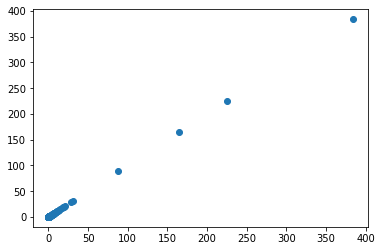

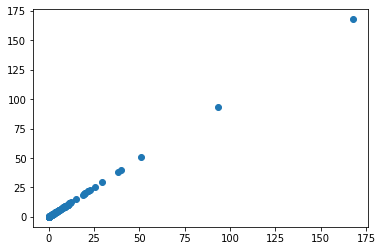

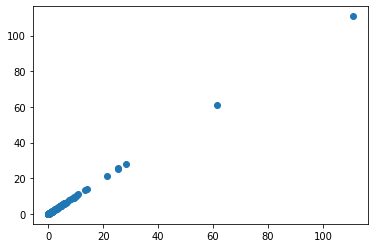

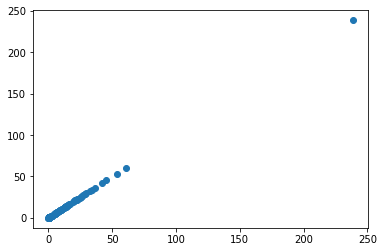

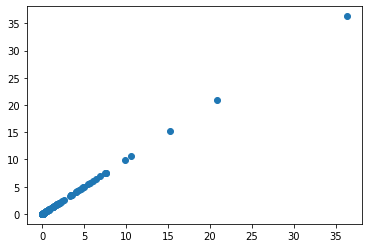

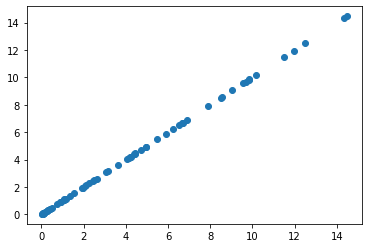

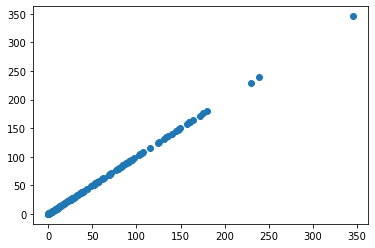

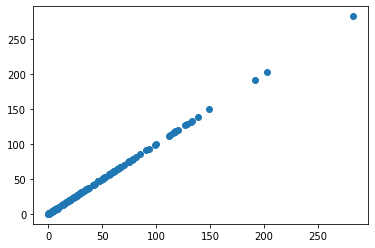

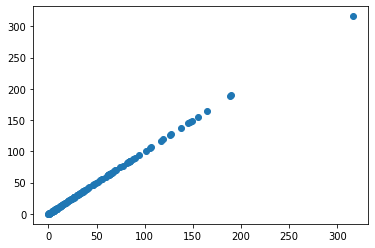

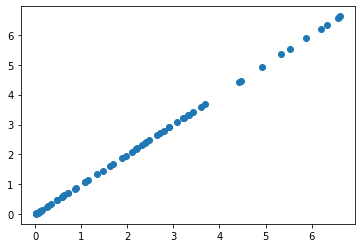

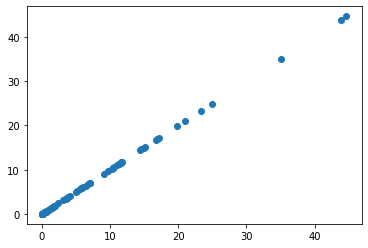

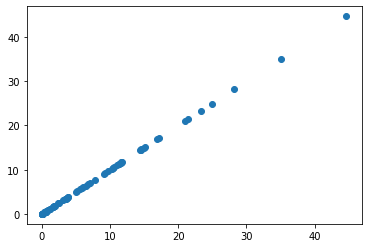

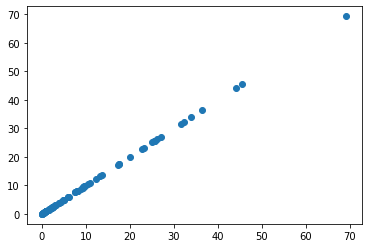

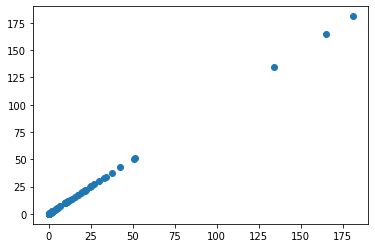

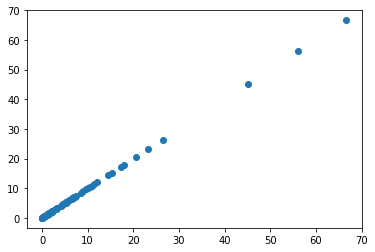

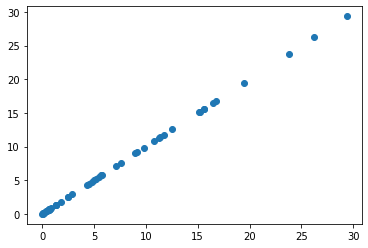

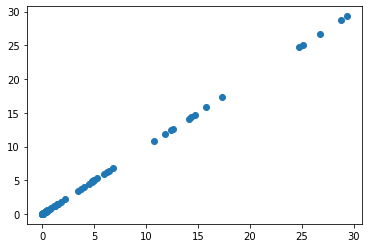

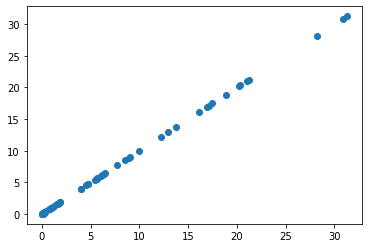

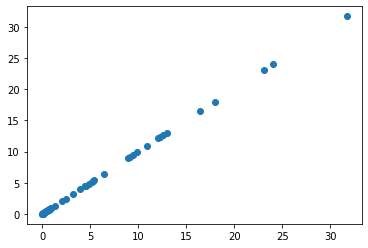

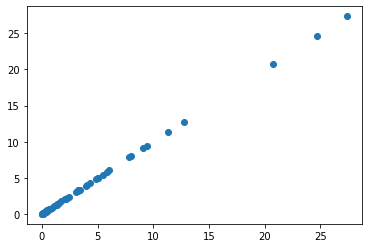

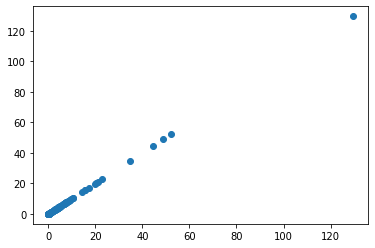

KeyboardInterrupt: 

In [7]:
from scipy.stats import pearsonr
for exon in (mpe.index & psix_object.adata.uns['mrna_per_event'].columns):
    plt.scatter(mpe.loc[exon], psix_object.adata.uns['mrna_per_event'].loc[mpe.columns, exon])
    plt.show()

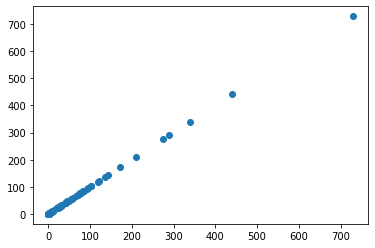

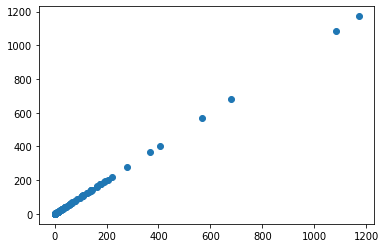

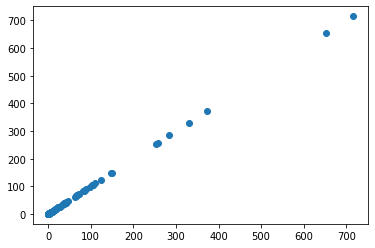

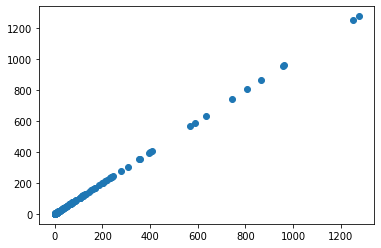

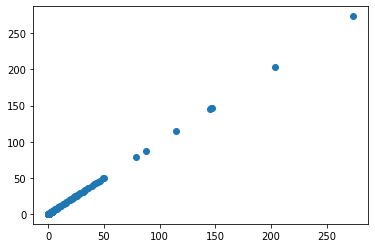

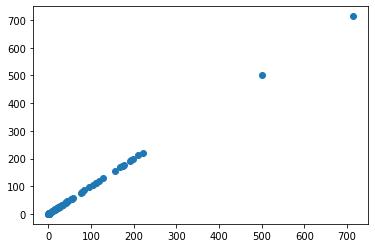

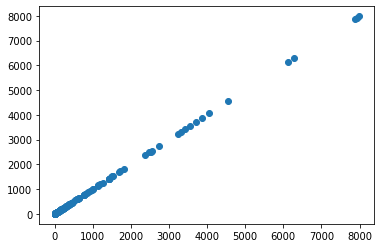

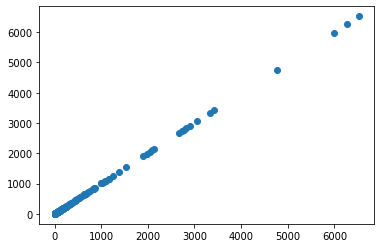

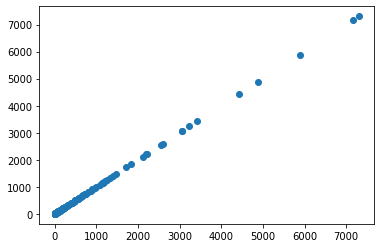

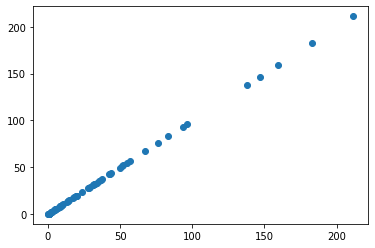

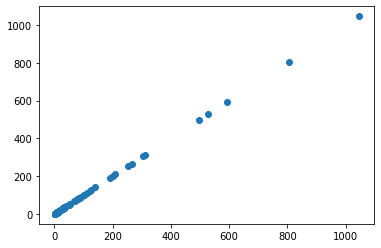

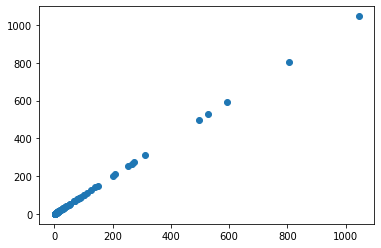

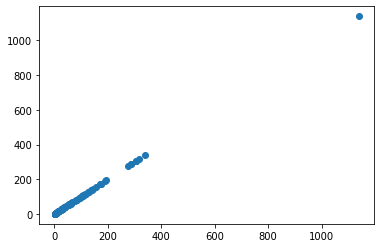

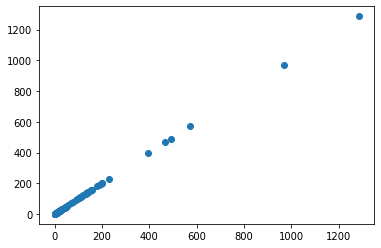

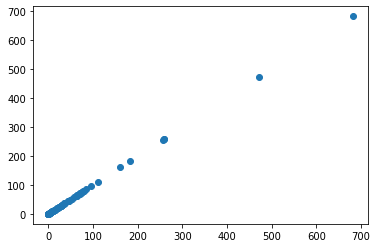

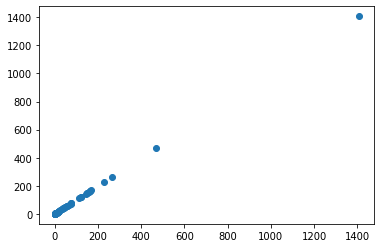

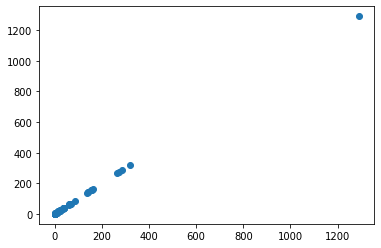

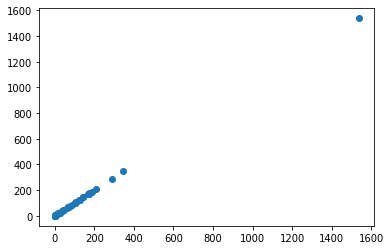

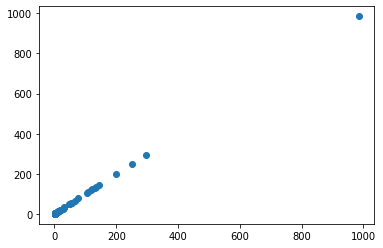

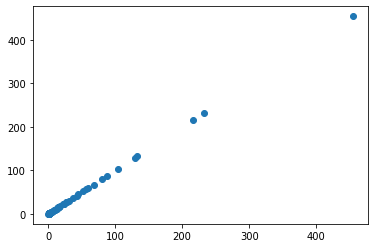

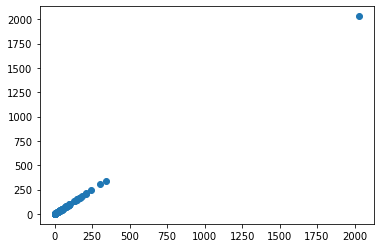

KeyboardInterrupt: 

In [17]:
from scipy.stats import pearsonr
for exon in (mpe.index & psix_object.adata.uns['mrna_per_event'].columns):
    plt.scatter(mrna_per_event.loc[exon, mpe.columns], psix_object.adata.uns['mrna_per_event'].loc[mpe.columns, exon])
    plt.show()

In [29]:
psix_object.adata.uns['psi'].loc[psi.columns, 'DPF2_4']

SRR4047247    NaN
SRR4047245    NaN
SRR4047246    NaN
SRR4047248    NaN
SRR4047249    0.0
             ... 
SRR4047454    NaN
SRR4047455    NaN
SRR4047456    NaN
SRR4047457    NaN
SRR4047458    0.0
Name: DPF2_4, Length: 202, dtype: float64

In [102]:
tpm = pd.read_csv('data/pipeline_output/rsem_gene_tpm.tab.gz', sep='\t', index_col=0)

In [39]:
tpm.shape

(35789, 202)

In [93]:
tpm2 = pd.read_csv('~/sc_binary_splicing/data/song/song.tpm.gene_symbols.tab.gz', sep='\t', index_col=0)

In [84]:
tpm2.shape

(35789, 214)

In [5]:
import numpy as np
import pandas as pd
import subprocess as sp
import os
from scipy.stats import gaussian_kde
from numpy import random as r
from tqdm import tqdm

from numba import jit

@jit
def normalize_equation(cell, moda):
    n = np.sum(np.log10(cell) <= moda)
    interval = np.sum(cell.loc[np.log10(cell) <= moda])/np.sum(cell)
    return n/interval

@jit
def get_transcripts_per_cell(cell, remove_outliers, bw_method, adjust_high):
    z = gaussian_kde(np.log10(cell), bw_method)
    
    moda = np.arange(-1, 10, 0.1)[z.pdf(np.arange(-1, 10, 0.1)).argmax()]
    
    molecules_in_cell = normalize_equation(cell, moda)
    
    
    if (molecules_in_cell > 10**5.5) and adjust_high:
        moda = np.arange(1, 10, 0.1)[z.pdf(np.arange(1, 10, 0.1)).argmax()]
    
        molecules_in_cell = normalize_equation(cell, moda)
            
    
    if remove_outliers and (molecules_in_cell > 10**5.5):
        
        return 0
        
    return molecules_in_cell
        
@jit    
def transform_cell(cell, remove_outliers, bw_method, adjust_high):
    cell_filtered = cell.loc[cell > 0.1]
    molecules_in_cell = get_transcripts_per_cell(cell_filtered, remove_outliers, bw_method, adjust_high)
    cell_remove_zeros = cell * (cell > 0.1)
    normalize_lysate = molecules_in_cell / 10**6
    cell_transcript_counts = cell_remove_zeros * normalize_lysate
    
    return cell_transcript_counts


def tpm2mrna(tpm_file, bw_method='scott', adjust_high = True, remove_outliers=True):
    tpm_dataset = pd.read_csv(tpm_file, sep='\t', index_col=0)
    mrna_counts = pd.DataFrame()
    mrna_counts_per_cell = []
    cells = tpm_dataset.columns
    tpm_dataset_filtered = tpm_dataset.loc[tpm_dataset.max(axis=1) > 0.1]
    
    for cell in tqdm(cells, position=0, leave=True):
        cell_mrna = transform_cell(tpm_dataset_filtered[cell], remove_outliers, bw_method, adjust_high)
        if all([x == 0 for x in cell_mrna]):
            continue
        mrna_counts[cell] = cell_mrna
        
    return mrna_counts




In [17]:
from tpm_to_mrna import tpm2mrna2

In [18]:
mrna3 = tpm2mrna2('data/pipeline_output/rsem_gene_tpm.tab.gz')

hola


  3%|▎         | 6/202 [00:00<00:07, 26.41it/s]

a ver
a ver
a ver
a ver
a ver
a ver


  6%|▌         | 12/202 [00:00<00:07, 26.78it/s]

a ver
a ver
a ver
a ver
a ver
a ver


  9%|▉         | 18/202 [00:00<00:06, 26.80it/s]

a ver
a ver
a ver
a ver
a ver
a ver


 10%|█         | 21/202 [00:00<00:06, 26.09it/s]

a ver
a ver
a ver
a ver
a ver


 13%|█▎        | 27/202 [00:01<00:06, 25.33it/s]

a ver
a ver
a ver
a ver
a ver


 16%|█▋        | 33/202 [00:01<00:06, 25.87it/s]

a ver
a ver
a ver
a ver
a ver
a ver


 19%|█▉        | 39/202 [00:01<00:06, 26.42it/s]

a ver
a ver
a ver
a ver
a ver
a ver


 22%|██▏       | 45/202 [00:01<00:05, 26.37it/s]

a ver
a ver
a ver
a ver
a ver
a ver


 25%|██▌       | 51/202 [00:01<00:05, 27.50it/s]

a ver
a ver
a ver
a ver
a ver
a ver


 29%|██▉       | 59/202 [00:02<00:04, 30.97it/s]

a ver
a ver
a ver
a ver
a ver
a ver
a ver
a ver


 34%|███▎      | 68/202 [00:02<00:03, 35.10it/s]

a ver
a ver
a ver
a ver
a ver
a ver
a ver
a ver
a ver


 38%|███▊      | 77/202 [00:02<00:03, 36.60it/s]

a ver
a ver
a ver
a ver
a ver
a ver
a ver
a ver
a ver


 40%|████      | 81/202 [00:02<00:03, 36.18it/s]

a ver
a ver
a ver
a ver
a ver
a ver


 44%|████▍     | 89/202 [00:03<00:03, 30.19it/s]

a ver
a ver
a ver
a ver
a ver
a ver


 46%|████▌     | 93/202 [00:03<00:03, 29.32it/s]

a ver
a ver
a ver
a ver
a ver
a ver


 50%|████▉     | 100/202 [00:03<00:04, 25.25it/s]

a ver
a ver
a ver
a ver
a ver


 52%|█████▏    | 106/202 [00:03<00:03, 25.39it/s]

a ver
a ver
a ver
a ver
a ver
a ver


 56%|█████▌    | 113/202 [00:03<00:03, 27.18it/s]

a ver
a ver
a ver
a ver
a ver
a ver
a ver


 59%|█████▉    | 119/202 [00:04<00:02, 28.14it/s]

a ver
a ver
a ver
a ver
a ver
a ver


 62%|██████▏   | 126/202 [00:04<00:02, 29.43it/s]

a ver
a ver
a ver
a ver
a ver
a ver
a ver


 66%|██████▌   | 133/202 [00:04<00:02, 29.73it/s]

a ver
a ver
a ver
a ver
a ver
a ver
a ver


 69%|██████▉   | 139/202 [00:04<00:02, 28.40it/s]

a ver
a ver
a ver
a ver
a ver
a ver


 72%|███████▏  | 145/202 [00:05<00:02, 25.13it/s]

a ver
a ver
a ver
a ver
a ver


 73%|███████▎  | 148/202 [00:05<00:02, 24.61it/s]

a ver
a ver
a ver
a ver
a ver


 76%|███████▌  | 154/202 [00:05<00:02, 23.80it/s]

a ver
a ver
a ver
a ver
a ver


 79%|███████▉  | 160/202 [00:05<00:01, 24.08it/s]

a ver
a ver
a ver
a ver
a ver


 81%|████████  | 163/202 [00:05<00:01, 24.02it/s]

a ver
a ver
a ver
a ver
a ver


 84%|████████▎ | 169/202 [00:06<00:01, 23.15it/s]

a ver
a ver
a ver
a ver
a ver


 87%|████████▋ | 175/202 [00:06<00:01, 22.18it/s]

a ver
a ver
a ver
a ver
a ver


 88%|████████▊ | 178/202 [00:06<00:01, 22.29it/s]

a ver
a ver
a ver
a ver
a ver


 91%|█████████ | 184/202 [00:06<00:00, 22.75it/s]

a ver
a ver
a ver
a ver
a ver


 94%|█████████▍| 190/202 [00:07<00:00, 22.57it/s]

a ver
a ver
a ver
a ver
a ver


 96%|█████████▌| 193/202 [00:07<00:00, 22.52it/s]

a ver
a ver
a ver
a ver
a ver


 99%|█████████▊| 199/202 [00:07<00:00, 21.87it/s]

a ver
a ver
a ver
a ver
a ver


100%|██████████| 202/202 [00:07<00:00, 26.42it/s]

a ver
a ver


In [5]:
psix_object.adata.uns['mrna_per_event']

,AAAS_3,AAMDC_3,AAMDC_6,AARSD1_6,AASDH_5,AASS_2,AASS_6,AASS_7,AASS_nmdSE_2,AASS_nmdSE_3,...,ZNF883_3,ZNF90_3,ZNF91_7,ZNHIT1_3,ZNHIT3_1,ZNRD1_1,ZRANB2_1,ZSWIM7_nmdSE_3,ZSWIM7_9,ZZZ3_3
SRR4047247,NaN,NaN,NaN,83.633915,NaN,2.941897,8.405419,5.883793,3.362167,1.260813,...,NaN,NaN,NaN,0.840542,NaN,NaN,NaN,NaN,NaN,NaN
SRR4047245,77.578477,175.029274,124.584156,4.968080,4.585920,22.929599,259.104471,182.290314,159.742875,NaN,...,NaN,NaN,NaN,18.343679,5.350240,103.183197,23.693919,NaN,NaN,NaN
SRR4047246,NaN,NaN,NaN,51.327675,35.348304,NaN,179.162638,134.129867,129.771857,NaN,...,53.264568,3.873787,NaN,43.580101,NaN,NaN,NaN,NaN,NaN,19.853157
SRR4047248,NaN,132.484511,NaN,0.432956,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,6.494339,NaN,16.452325,7.360251,NaN,43.728548,NaN,NaN,NaN
SRR4047249,7.503165,NaN,NaN,9.003798,NaN,NaN,7.503165,7.878323,10.504431,NaN,...,NaN,NaN,52.897313,21.759179,21.384020,32.638768,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SRR4047454,NaN,NaN,NaN,237.024293,NaN,168.875653,4062.323789,3338.286046,3231.242817,67.151342,...,45.543237,NaN,NaN,NaN,323.456714,NaN,56.513506,143.610792,1.994594,NaN
SRR4047455,172.499861,27.351986,10.940795,238.874015,145.147875,173.958634,7933.534845,5986.073409,5886.512179,54.703973,...,NaN,1175.770724,NaN,784.454972,72.573937,851.923205,44.492565,244.344412,2.188159,NaN
SRR4047456,NaN,680.904005,329.639364,104.619585,15.780608,713.341921,6288.572227,2898.663875,4886.435997,182.645924,...,4.967969,265.055765,NaN,28.638881,NaN,NaN,0.292233,1242.576751,NaN,NaN
SRR4047457,1.455598,NaN,NaN,1276.195262,NaN,NaN,3417.379443,2824.223390,2600.425248,0.727799,...,NaN,65.501895,271.468967,317.320293,1089.878760,219.795249,516.009376,448.687984,1.455598,NaN


In [6]:
mrna = psix_object.adata.uns['mrna'].T
psi = psix_object.adata.uns['psi'].T
reads = psix_object.adata.uns['reads'].T

In [7]:
from rnaseq_tools import *

In [8]:
reads

,SRR4047247,SRR4047245,SRR4047246,SRR4047248,SRR4047249,SRR4047250,SRR4047251,SRR4047252,SRR4047253,SRR4047254,...,SRR4047449,SRR4047450,SRR4047451,SRR4047452,SRR4047453,SRR4047454,SRR4047455,SRR4047456,SRR4047457,SRR4047458
AAAS_3,0,203,0,0,20,48,1,0,0,0,...,0,674,1205,1,390,0,473,0,4,0
AAMDC_3,0,229,0,153,0,178,13,0,0,0,...,158,124,24,425,223,0,38,1165,0,0
AAMDC_6,0,163,0,0,0,0,7,0,0,0,...,118,84,31,391,275,0,30,564,0,0
AARSD1_6,199,13,106,1,24,0,39,43,7,262,...,95,916,967,1198,1611,713,655,358,3507,125
AASDH_5,0,12,73,0,0,0,0,52,3,58,...,0,3,80,0,57,0,398,54,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZNRD1_1,0,270,0,0,87,0,0,68,0,0,...,0,1508,174,85,0,0,2336,0,604,4037
ZRANB2_1,0,31,0,101,0,0,0,83,0,278,...,117,175,32,158,557,85,122,1,1075,1759
ZSWIM7_nmdSE_3,0,0,0,0,0,0,0,305,0,0,...,3,499,261,44,355,216,335,2126,617,757
ZSWIM7_9,0,0,0,0,0,0,0,0,0,0,...,0,229,166,5,126,3,3,0,4,0


In [45]:
mrna_per_event, sj_mean = get_mrna_per_event3(mrna, psi, reads, 'data/pipeline_output/constitutive_introns.tab.gz')

(array([ 15., 138.,  38.,   6.,   3.,   1.,   0.,   0.,   0.,   1.]),
 array([  694.72765072,  8236.43906416, 15778.1504776 , 23319.86189104,
        30861.57330448, 38403.28471792, 45944.99613136, 53486.7075448 ,
        61028.41895824, 68570.13037168, 76111.84178512]),
 <a list of 10 Patch objects>)

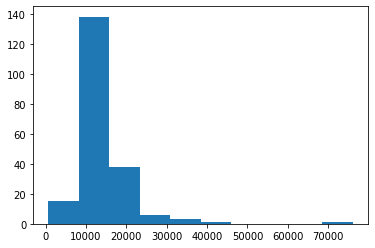

In [8]:
plt.hist(psix_object.adata.uns['mrna_per_event'].sum(axis=1))

In [24]:
ci = pd.read_csv('data/pipeline_output/constitutive_introns.tab.gz', sep='\t', index_col=0)

In [25]:
ci_old = pd.read_csv('~/data_sc_regulation/song/constitutive_introns.tab', sep='\t', index_col=0)

In [32]:
mrna_per_event.loc['AARSD1_6']

SRR4047247      83.633915
SRR4047245       4.968080
SRR4047246      51.327675
SRR4047248       0.432956
SRR4047249       9.003798
                 ...     
SRR4047454     237.024293
SRR4047455     238.874015
SRR4047456     104.619585
SRR4047457    1276.195262
SRR4047458      26.960348
Name: AARSD1_6, Length: 202, dtype: float64

(array([143.,  31.,   9.,   3.,   4.,   6.,   3.,   2.,   0.,   1.]),
 array([  13822.88115958,  406777.19933508,  799731.51751058,
        1192685.83568608, 1585640.15386158, 1978594.47203708,
        2371548.79021258, 2764503.10838808, 3157457.42656358,
        3550411.74473908, 3943366.06291458]),
 <a list of 10 Patch objects>)

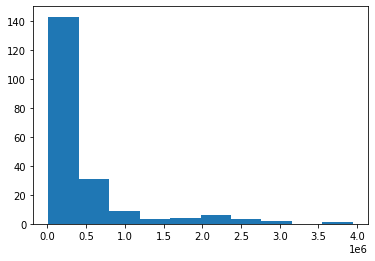

In [50]:
plt.hist(mrna.sum())

(array([5.5598e+04, 2.8600e+02, 3.0700e+02, 3.7100e+02, 5.0500e+02,
        8.0300e+02, 9.9500e+02, 4.7300e+02, 1.1800e+02, 2.1000e+01]),
 array([0.        , 0.37316693, 0.74633387, 1.1195008 , 1.49266773,
        1.86583467, 2.2390016 , 2.61216853, 2.98533547, 3.3585024 ,
        3.73166933]),
 <a list of 10 Patch objects>)

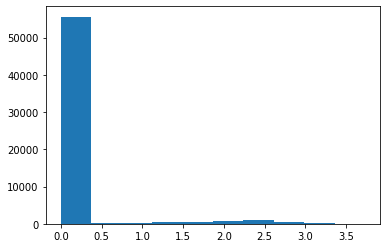

In [39]:
plt.hist(np.log10(ci['SRR4047247']+1))

In [33]:
mrna.loc['AARSD1']

SRR4047247     40.613422
SRR4047245      4.021851
SRR4047246     24.431630
SRR4047248      0.960721
SRR4047249      6.031545
                 ...    
SRR4047454    107.888831
SRR4047455    145.676308
SRR4047456     38.863499
SRR4047457    661.711556
SRR4047458     17.683911
Name: AARSD1, Length: 202, dtype: float64

In [29]:
ci_old.sum().loc[ci.columns]

SRR4047247      909190
SRR4047245     1065392
SRR4047246      859274
SRR4047248      790321
SRR4047249      797832
                ...   
SRR4047454     5098947
SRR4047455    17015987
SRR4047456    11769683
SRR4047457    10960160
SRR4047458    12643481
Length: 202, dtype: int64

In [44]:
def get_mrna_per_event3(mrna, psi, reads, constitutive_sj_file):

    constitutive_sj = pd.read_csv(constitutive_sj_file, sep='\t', index_col=0)
    obs_mrna = mrna.index[mrna.median(axis=1) >= 10]
    obs_junctions = [x for x in constitutive_sj.index if x.split('_')[0] in obs_mrna]

    mrna_per_junction = mrna.loc[[x.split('_')[0] for x in obs_junctions]]
    mrna_per_junction.index = obs_junctions

    reads_per_junction = (constitutive_sj.loc[obs_junctions] / mrna_per_junction).replace([np.inf, -np.inf], np.nan)
    SJ_mean = reads_per_junction.mean()
    
    mrna_events = (reads/(SJ_mean * (1+psi)))
    
    return mrna_events, SJ_mean

(array([3.0865e+04, 8.0000e+02, 5.1100e+02, 5.1000e+02, 6.6000e+02,
        9.0300e+02, 1.0260e+03, 4.4700e+02, 5.9000e+01, 8.0000e+00]),
 array([ 0.        ,  1.19507091,  2.39014181,  3.58521272,  4.78028362,
         5.97535453,  7.17042544,  8.36549634,  9.56056725, 10.75563815,
        11.95070906]),
 <a list of 10 Patch objects>)

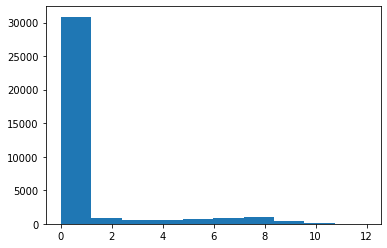

In [64]:
plt.hist(np.log1p(tpm['SRR4047247']))

In [7]:
mrna1 = tpm2mrna('data/pipeline_output/rsem_gene_tpm.tab.gz')

100%|██████████| 202/202 [00:07<00:00, 26.08it/s]


In [76]:

def normalize_equation(cell, moda):
    n = np.sum(np.log10(cell) <= moda)
    interval = np.sum(cell.loc[np.log10(cell) <= moda])/np.sum(cell)
    return n/interval
    

def get_transcripts_per_cell(cell, plot_hist, correct_high, bw_method, adjust_high):
    z = gaussian_kde(np.log10(cell), bw_method)
    
    moda = np.arange(-1, 10, 0.1)[z.pdf(np.arange(-1, 10, 0.1)).argmax()]
    
    molecules_in_cell = normalize_equation(cell, moda)
    
    
    if (molecules_in_cell > 1000000) and adjust_high:
        print('happened')
        moda = np.arange(1, 10, 0.1)[z.pdf(np.arange(1, 10, 0.1)).argmax()]
    
        molecules_in_cell = normalize_equation(cell, moda)
            
    
    if correct_high and (molecules_in_cell > 1000000):
        
        return 0
        
    if plot_hist:
        plt.figure()
        plt.hist(np.log10(cell), density=True, alpha=0.15)
        plt.plot([moda, moda],
                 [0, z.pdf(moda)[0]], '--', linewidth=3, c='navy')
        plt.plot(np.arange(-1, 5, 0.01), z.pdf(np.arange(-1, 5, 0.01)), c='darkred', linewidth=5)

        plt.show()
    
    return molecules_in_cell
        

def transform_cell(cell, plot_hist, correct_high, bw_method, adjust_high):
    cell_filtered = cell.loc[cell > 0.1]
    molecules_in_cell = get_transcripts_per_cell(cell_filtered, plot_hist, correct_high, bw_method, adjust_high)
    cell_remove_zeros = cell * (cell > 0.1)
    normalize_lysate = molecules_in_cell / 1000000
    cell_transcript_counts = cell_remove_zeros * normalize_lysate
    
    return cell_transcript_counts#, molecules_in_cell


def transform_tpm_to_counts(tpm_dataset, plot_hist = True, correct_high = True, bw_method='scott', adjust_high = False):
    mrna_counts = pd.DataFrame()
    mrna_counts_per_cell = []
    cells = tpm_dataset.columns
    tpm_dataset_filtered = tpm_dataset.loc[tpm_dataset.max(axis=1) > 0.1]
    
    for cell in cells:
        cell_mrna = transform_cell(tpm_dataset_filtered[cell], plot_hist, correct_high, bw_method, adjust_high)
        if all([x == 0 for x in cell_mrna]):
            print('Skipping cell')
            continue
        mrna_counts[cell] = cell_mrna
        
    return mrna_counts



In [103]:
mrna2 = transform_tpm_to_counts(tpm, adjust_high=True, plot_hist=False)

In [104]:
mrna2.sum().median()

61066.795796190614

(array([ 5., 28., 48., 38., 33., 13., 19.,  5.,  5.,  3.,  3.,  0.,  1.,
         0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([ 20955.54553694,  32082.55932391,  43209.57311088,  54336.58689785,
         65463.60068482,  76590.6144718 ,  87717.62825877,  98844.64204574,
        109971.65583271, 121098.66961968, 132225.68340665, 143352.69719362,
        154479.71098059, 165606.72476756, 176733.73855454, 187860.75234151,
        198987.76612848, 210114.77991545, 221241.79370242, 232368.80748939,
        243495.82127636]),
 <a list of 20 Patch objects>)

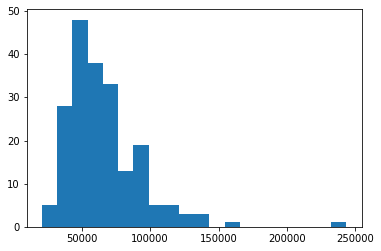

In [105]:
plt.hist(mrna2.sum(), bins=20)

In [69]:
old_mrna = pd.read_csv('~/sc_binary_splicing/data/song/song_mrna_counts.tab.gz', sep='\t', index_col=0)

(array([33., 86., 46., 24.,  8.,  3.,  1.,  0.,  0.,  1.]),
 array([ 20955.54553694,  43209.57311088,  65463.60068482,  87717.62825877,
        109971.65583271, 132225.68340665, 154479.71098059, 176733.73855454,
        198987.76612848, 221241.79370242, 243495.82127636]),
 <a list of 10 Patch objects>)

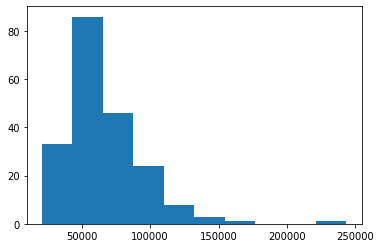

In [72]:
plt.hist(old_mrna.sum())

In [12]:
mrna1

,SRR4047247,SRR4047245,SRR4047246,SRR4047248,SRR4047249,SRR4047250,SRR4047251,SRR4047252,SRR4047253,SRR4047254,...,SRR4047449,SRR4047450,SRR4047451,SRR4047452,SRR4047453,SRR4047454,SRR4047455,SRR4047456,SRR4047457,SRR4047458
hgnc_symbol,,,,,,,,,,,,,,,,,,,,,
TSPAN6,0.03376,229.211131,15.269769,127.415592,82.416754,121.433202,62.246521,0.000000,0.069512,30.829514,...,407.526455,464.921462,82.729899,613.078943,417.612190,246.991188,20.987704,1095.276086,1175.252043,353.963444
TNMD,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,216.996920,0.000000
DPM1,0.00000,3.334355,0.000000,0.360270,12.149255,23.619054,37.885089,144.388473,10.948176,62.881474,...,15.926062,10.415422,90.597753,1.270699,45.946885,46.380698,256.837025,9.917240,196.307787,19.680482
SCYL3,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.047121,46.204311,61.575323,59.721002,...,7.059424,0.000000,21.548526,0.133758,0.212692,0.000000,55.289482,95.094752,0.000000,40.787085
C1orf112,0.00000,0.000000,0.041270,0.000000,8.788823,25.985184,1.649227,0.376666,0.499098,0.178895,...,0.338852,0.000000,0.000000,0.000000,10.285558,77.114896,8.985361,0.000000,7.442626,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LINC02456,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
SMUG1-AS1,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
CENPVL2,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.342569,0.023769


In [52]:
mrna2

NameError: name 'mrna2' is not defined

In [51]:
mrna3

NameError: name 'mrna3' is not defined

In [10]:
ci = pd.read_csv('data/pipeline_output/constitutive_introns.tab.gz', sep='\t', index_col=0)

In [11]:
ci

,SRR4047247,SRR4047245,SRR4047246,SRR4047248,SRR4047249,SRR4047250,SRR4047251,SRR4047252,SRR4047253,SRR4047254,...,SRR4047449,SRR4047450,SRR4047451,SRR4047452,SRR4047453,SRR4047454,SRR4047455,SRR4047456,SRR4047457,SRR4047458
A1BG_1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A1BG_2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A1CF_1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,3,0,0,0,0,0,0
A1CF_2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A2M_1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZZEF1_10,0,0,0,0,0,0,0,0,0,0,...,8,66,0,0,0,0,0,0,46,6
ZZEF1_11,0,0,0,0,0,0,0,0,0,0,...,24,45,0,0,0,0,0,0,54,22
ZZEF1_12,0,0,0,0,0,0,0,0,0,0,...,17,0,0,0,0,0,0,0,55,13
ZZEF1_13,0,0,0,0,0,0,0,0,0,0,...,9,0,0,0,0,0,20,0,0,15


In [14]:
song_constitutive = pd.read_csv('~/sc_binary_splicing/data/song_SJ_constitutive_counts.tab', sep='\t', index_col=0)

FileNotFoundError: [Errno 2] File /mnt/lareaulab/cfbuenabadn/sc_binary_splicing/data/song_SJ_constitutive_counts.tab does not exist: '/mnt/lareaulab/cfbuenabadn/sc_binary_splicing/data/song_SJ_constitutive_counts.tab'